In [2]:
import pandas as pd
import numpy as np
import re
import re as sub
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:

try:
    with open('corpus_all.txt', 'r', encoding='utf-8') as file:
        lines = []  # Empty list to store the lines
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace
    
    with open('stopwords-bn.txt', 'r', encoding='utf-8') as test:
        stopwords_bn = test.readlines()
        # the above stopwords contains newline \n
        stop_bn = []

        for word in stopwords_bn:
            stop_bn.append(word.rstrip("\r\n"))
            
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise",]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
    
df = pd.DataFrame(extracted_data)

In [4]:
df

,Status,Sentence
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6284,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6285,surprise,এই কি স্বাধীন দেশ
6286,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6287,angry,চুদলাম দাদা পয়সা নাই


In [5]:

def text_pre_processing(text):
    #remove stop words from the text
    text = ' '.join(word for word in text.split() if word not in stop_bn)
    #remove punctuation from the text
    text = re.sub(r'[^\w\s]', '', text)
    #remove numbers from the text
    text = re.sub(r'[0-9]', '', text)
    #remove extra spaces from the text
    text = re.sub(' +', ' ', text)
    return text

df['Sentence'] = df['Sentence'].apply(text_pre_processing)

In [6]:
df

,Status,Sentence
0,sad,বরবর মননয পরধনমনতর গণপরজতনতর বলদশ সরকর মননয পর...
1,sad,তদনত লভ তদনতর হয়ছ মন রজনতক শকতর তদনত পরব সমনয ...
2,angry,দশক মধযম আয়র দশ রপনতর মগর মলকর দশ পরনত হচছ
3,happy,গরবত মসলম সগরম যদধ চর রণবর আললহ ছর নচ শর নরয় ত...
4,angry,রতর বল কসর সকল
...,...,...
6284,surprise,ভরত পরতদন ১৮ ট রপ কইস এনটর
6285,surprise,সবধন দশ
6286,sad,সবধন দশর নগরক হয় পরধন
6287,angry,চদলম দদ পয়স


<Axes: >

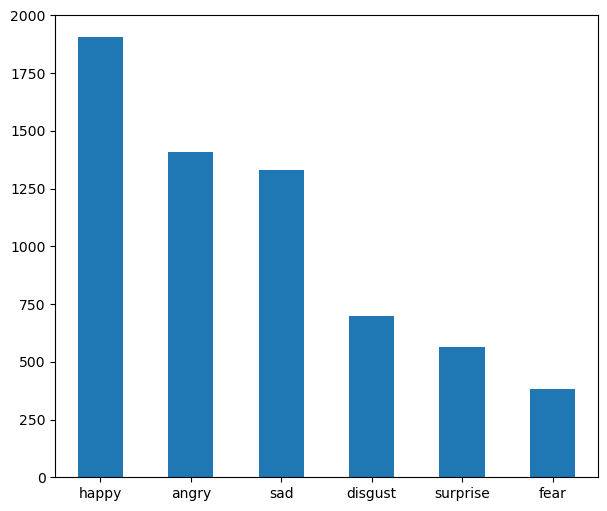

In [7]:
df['Status'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)


In [8]:
# Data convert categorical to numerical
df['Status'] = df['Status'].map({'happy': 0, 'angry': 1, 'fear': 2, 'disgust': 3, 'sad': 4, 'surprise': 5})

In [9]:
# vectorization of the text using TF-IDF vectorizer 
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
X = tfidf.fit_transform(df['Sentence'])
y = df['Status']


In [10]:
X,y

(<6289x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 38142 stored elements in Compressed Sparse Row format>,
 0       4
 1       4
 2       1
 3       0
 4       1
        ..
 6284    5
 6285    5
 6286    4
 6287    1
 6288    4
 Name: Status, Length: 6289, dtype: int64)

In [39]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report



Naive Bayes Accuracy Score:  0.5047694753577107


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.57      0.88      0.69       391
           1       0.46      0.59      0.52       268
           2       0.00      0.00      0.00        66
           3       0.17      0.01      0.01       141
           4       0.43      0.46      0.44       278
           5       0.56      0.04      0.08       114

    accuracy                           0.50      1258
   macro avg       0.36      0.33      0.29      1258
weighted avg       0.44      0.50      0.43      1258



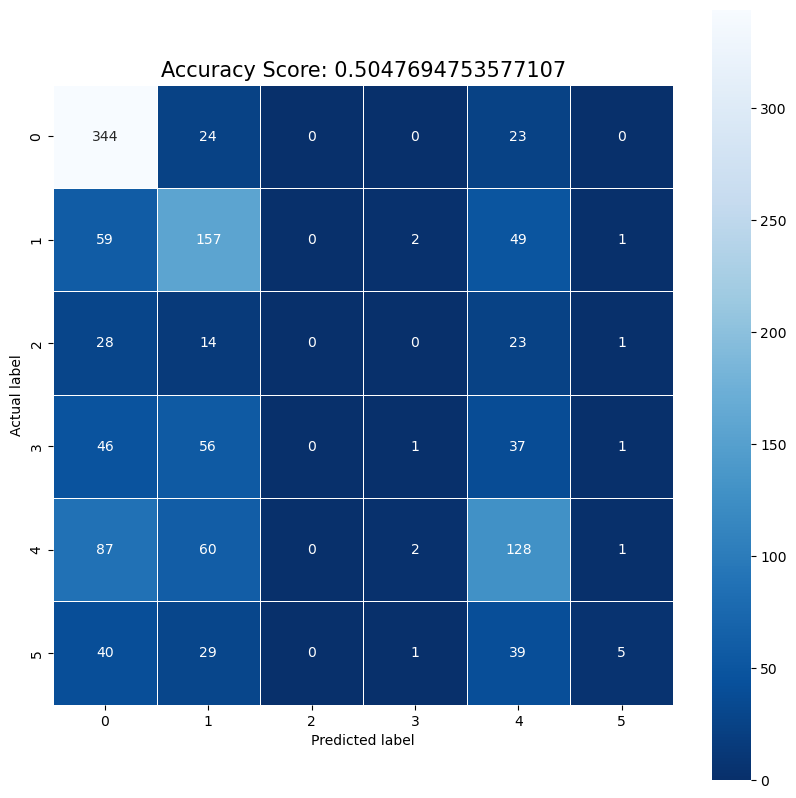

In [19]:
# Multinomial Naive Bayes Classifier
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print('Naive Bayes Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

print(classification_report(y_test,y_pred))


SVM Accuracy Score:  0.4737678855325914
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       391
           1       0.42      0.53      0.47       268
           2       0.22      0.03      0.05        66
           3       0.21      0.03      0.05       141
           4       0.38      0.43      0.40       278
           5       0.28      0.07      0.11       114

    accuracy                           0.47      1258
   macro avg       0.35      0.32      0.29      1258
weighted avg       0.42      0.47      0.42      1258



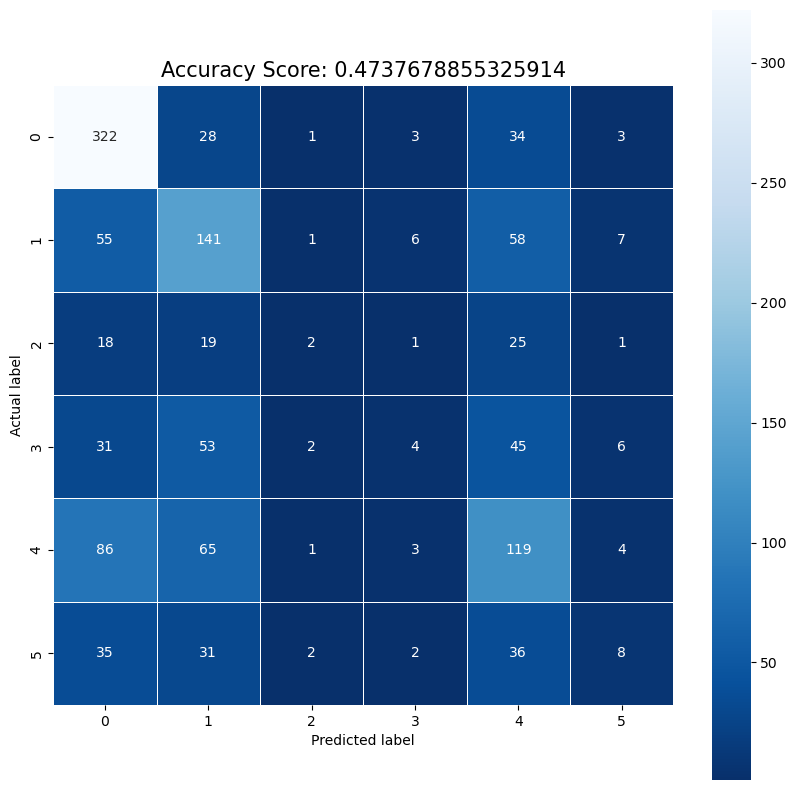

In [20]:
# Support Vector Machine Classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print('SVM Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

print(classification_report(y_test,y_pred))


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score:  0.4841017488076312
              precision    recall  f1-score   support

           0       0.58      0.83      0.68       391
           1       0.45      0.53      0.49       268
           2       0.30      0.05      0.08        66
           3       0.16      0.03      0.05       141
           4       0.41      0.47      0.44       278
           5       0.21      0.04      0.07       114

    accuracy                           0.48      1258
   macro avg       0.35      0.32      0.30      1258
weighted avg       0.42      0.48      0.43      1258



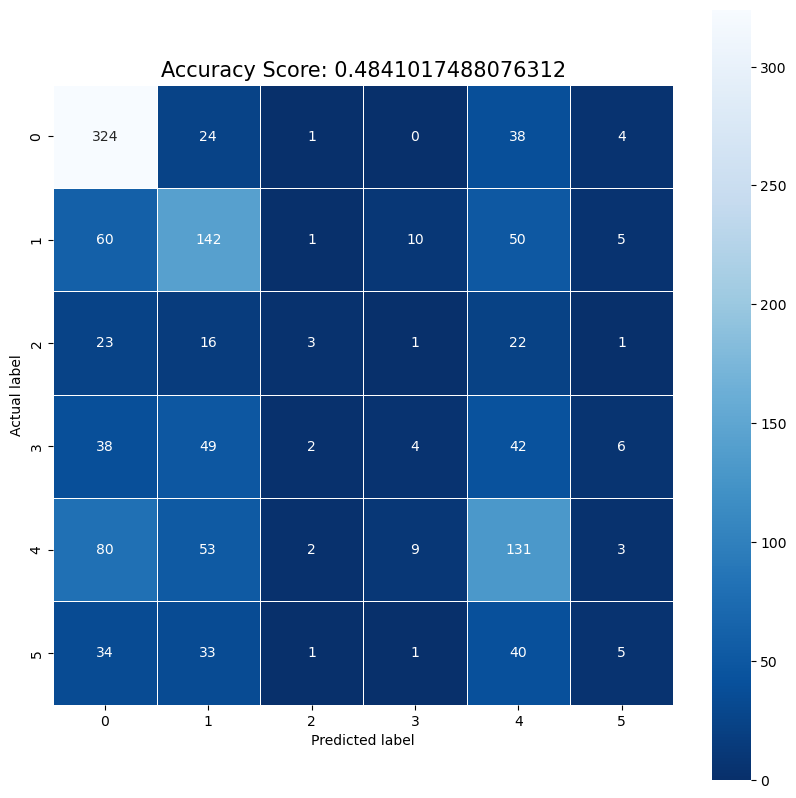

In [21]:
# Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Logistic Regression Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

print(classification_report(y_test,y_pred))


Random Forest Accuracy Score:  0.4825119236883943
              precision    recall  f1-score   support

           0       0.59      0.81      0.68       391
           1       0.45      0.52      0.48       268
           2       0.21      0.08      0.11        66
           3       0.23      0.06      0.10       141
           4       0.40      0.46      0.43       278
           5       0.32      0.08      0.13       114

    accuracy                           0.48      1258
   macro avg       0.37      0.33      0.32      1258
weighted avg       0.43      0.48      0.44      1258



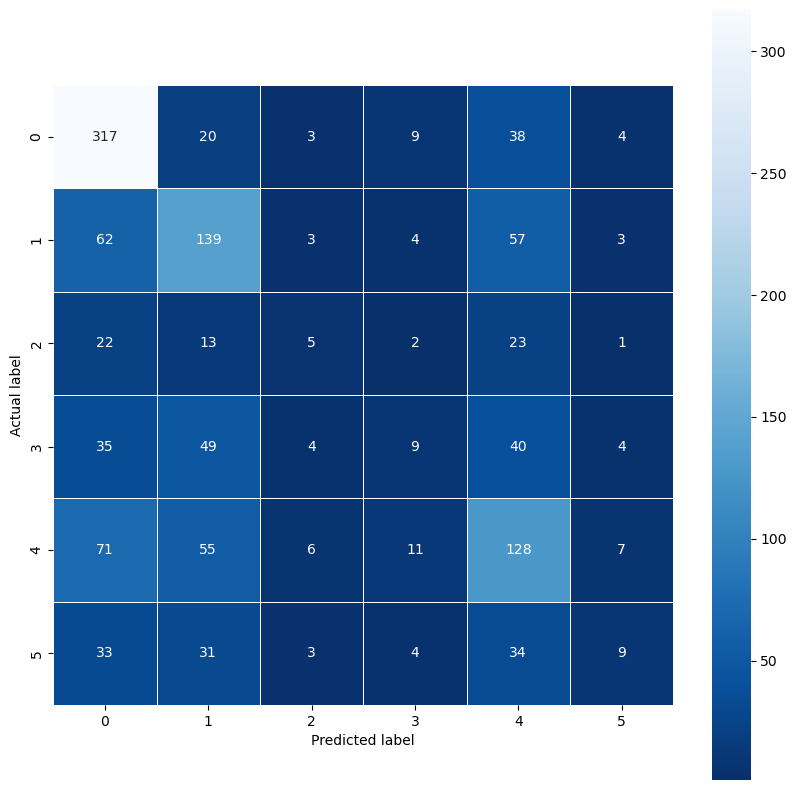

In [22]:
# Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('Random Forest Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

Decision Tree Accuracy Score:  0.4364069952305246
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       391
           1       0.46      0.46      0.46       268
           2       0.20      0.20      0.20        66
           3       0.21      0.13      0.16       141
           4       0.38      0.38      0.38       278
           5       0.15      0.10      0.12       114

    accuracy                           0.44      1258
   macro avg       0.33      0.33      0.33      1258
weighted avg       0.41      0.44      0.42      1258



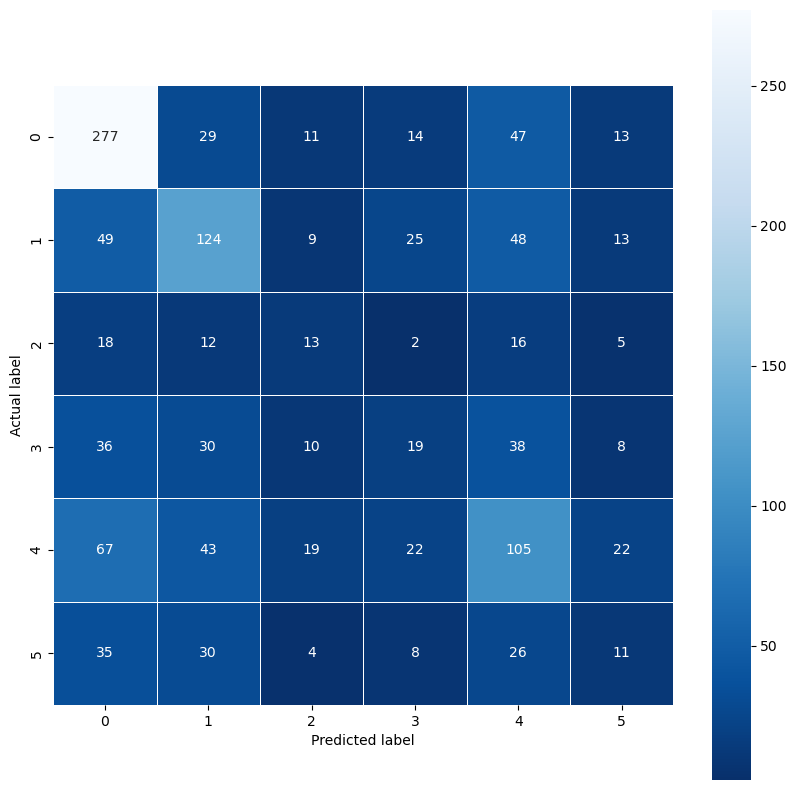

In [23]:
# Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('Decision Tree Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy Score:  0.492845786963434
              precision    recall  f1-score   support

           0       0.57      0.86      0.69       391
           1       0.44      0.57      0.50       268
           2       0.20      0.03      0.05        66
           3       0.13      0.01      0.03       141
           4       0.43      0.45      0.44       278
           5       0.29      0.04      0.06       114

    accuracy                           0.49      1258
   macro avg       0.34      0.33      0.29      1258
weighted avg       0.42      0.49      0.43      1258



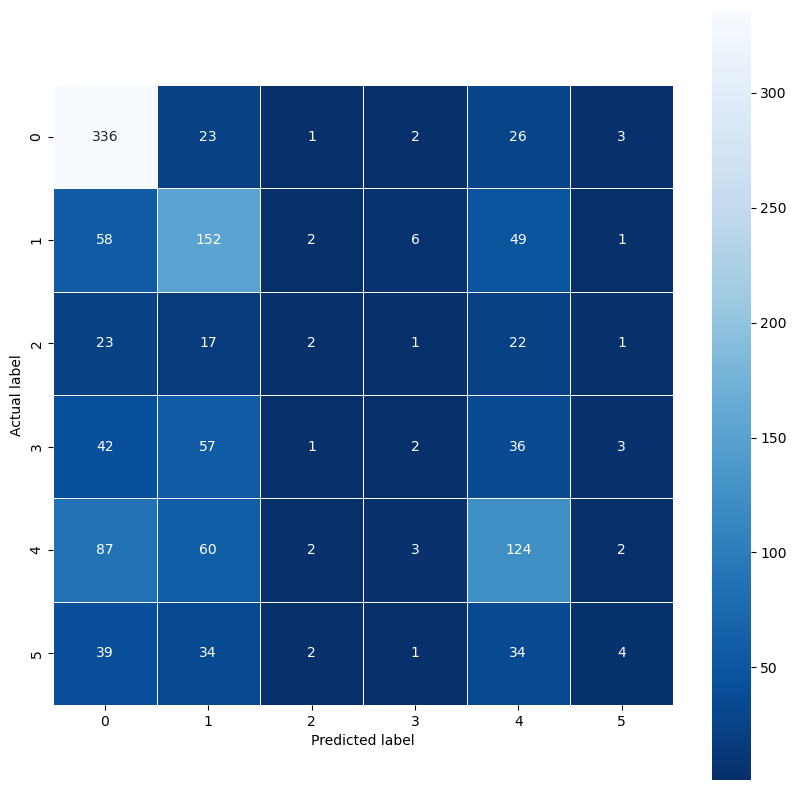

In [24]:
# Ensemble Model
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('NB', NB), ('SVM', SVM), ('LR', LR), ('RF', RF), ('DT', DT)], voting='hard')
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print('Ensemble Model Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

In [25]:
# KNN, K-Means, Hierarchical Clustering, PCA, LDA, QDA, 
# Neural Network, ANN
# Deep Learning, RNN, LSTM, GRU, CNN, BERT, GPT-2, GAN, GNN, Autoencoder, Reinforcement Learning
# 5 hybrid models (2+ models) - 5 different combinations of models (e.g. SVM+LR, SVM+RF, SVM+DT, SVM+NB, LR+RF, LR+DT, LR+NB, RF+DT, RF+NB, DT+NB)
# 5 hybrid models ML + DL (e.g. SVM+LSTM, SVM+CNN, SVM+BERT, SVM+GPT-2, SVM+Transformer, LR+LSTM, LR+CNN, LR+BERT, LR+GPT-2, LR+Transformer, RF+LSTM, RF+CNN, RF+BERT, RF+GPT-2, RF+Transformer, DT+LSTM, DT+CNN, DT+BERT, DT+GPT-2, DT+Transformer, NB+LSTM, NB+CNN, NB+BERT, NB+GPT-2, NB+Transformer)

KNN Accuracy Score:  0.3744038155802862
              precision    recall  f1-score   support

           0       0.63      0.54      0.59       391
           1       0.28      0.79      0.41       268
           2       0.14      0.11      0.12        66
           3       0.05      0.01      0.01       141
           4       0.46      0.11      0.17       278
           5       0.38      0.07      0.12       114

    accuracy                           0.37      1258
   macro avg       0.32      0.27      0.24      1258
weighted avg       0.41      0.37      0.33      1258



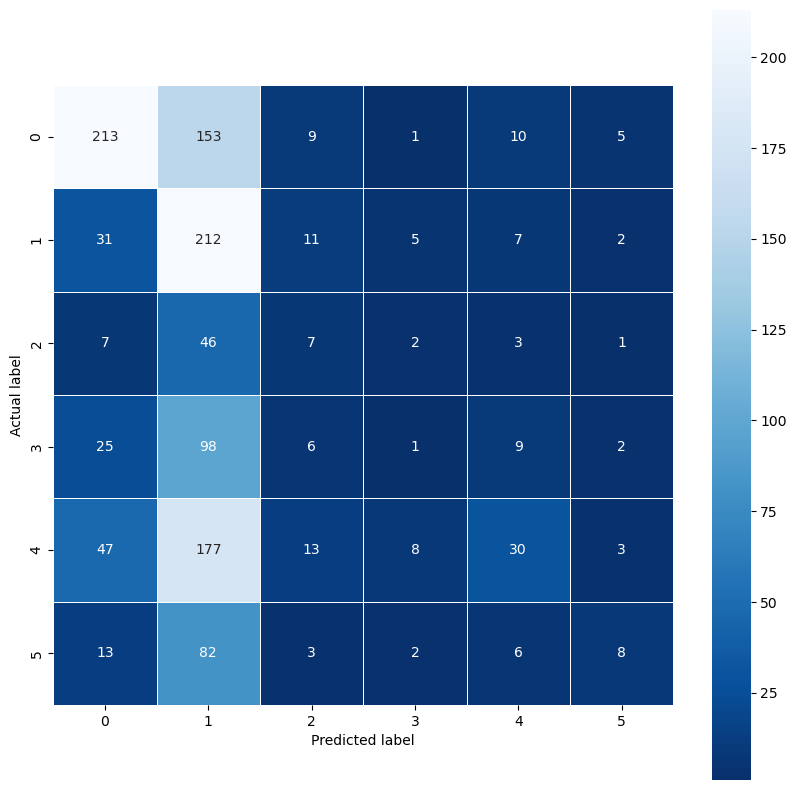

In [26]:
# KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print('KNN Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering Accuracy Score:  0.15500794912559618
              precision    recall  f1-score   support

           0       1.00      0.14      0.24       391
           1       0.09      0.02      0.04       268
           2       0.07      0.08      0.07        66
           3       0.12      0.78      0.20       141
           4       0.24      0.06      0.09       278
           5       0.07      0.04      0.05       114

    accuracy                           0.16      1258
   macro avg       0.26      0.18      0.12      1258
weighted avg       0.41      0.16      0.13      1258



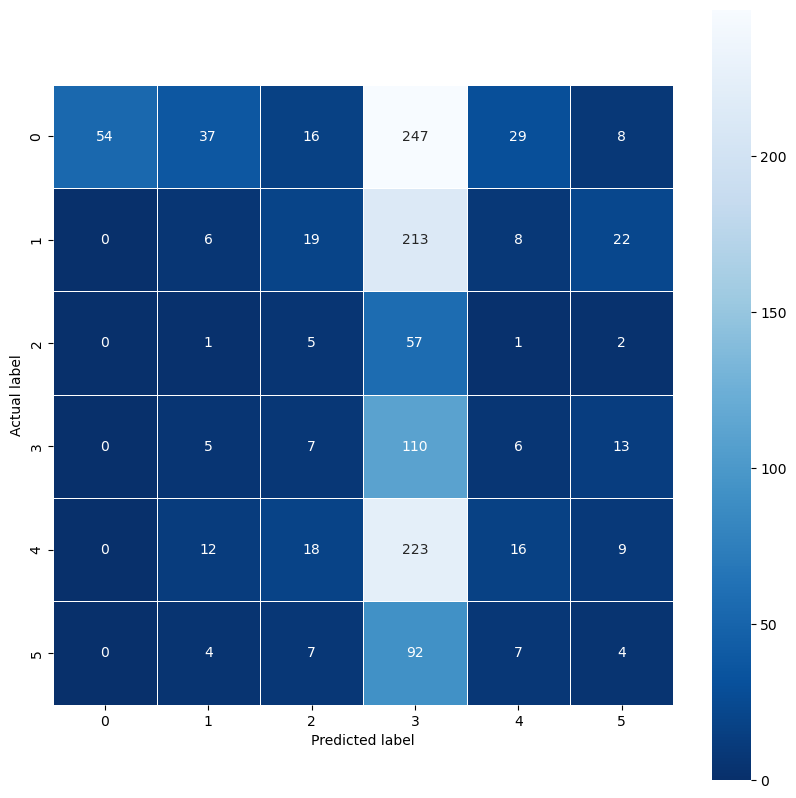

In [27]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_train,y_train)
y_pred = kmeans.predict(X_test)
print('K-Means Clustering Accuracy Score: ',accuracy_score(y_test,y_pred))

# print status with text in confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

In [40]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
#A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
X_train_cluster = X_train.toarray()
X_test_cluster = X_test.toarray()
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical.fit(X_train_cluster,y_train)
y_pred = hierarchical.fit_predict(X_test_cluster)
print('Hierarchical Clustering Accuracy Score: ',accuracy_score(y_test,y_pred))


Hierarchical Clustering Accuracy Score:  0.2273449920508744


In [51]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
import numpy as np

# Create and fit the TruncatedSVD transformer
svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Now you need to create and fit an LDA classifier with the SVD-transformed data
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_svd, y_train)

# Make predictions on the SVD-transformed test data
y_pred = LDA.predict(X_test_svd)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('TruncatedSVD + LDA Classifier Accuracy Score:', accuracy)


TruncatedSVD + LDA Classifier Accuracy Score: 0.35532591414944353


In [49]:
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Create and fit the LDA classifier
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_dense, y_train)

# Make predictions
y_pred = LDA.predict(X_test_dense)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LDA Classifier Accuracy Score:', accuracy)


LDA Classifier Accuracy Score: 0.431637519872814


In [52]:
# QDA (Quadratic Discriminant Analysis)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Create and fit the QDA classifier
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_dense, y_train)

# Make predictions
y_pred = QDA.predict(X_test_dense)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('QDA Classifier Accuracy Score:', accuracy)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Classifier Accuracy Score: 0.383147853736089


In [53]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Create and fit the MLP classifier
MLP = MLPClassifier()
MLP.fit(X_train_dense, y_train)

# Make predictions
y_pred = MLP.predict(X_test_dense)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('MLP Classifier Accuracy Score:', accuracy)

MLP Classifier Accuracy Score: 0.4236883942766296


c:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
# ANN (Artificial Neural Network)
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create and fit the TruncatedSVD transformer
svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Create an MLP (Multi-layer Perceptron) classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the MLP classifier on the SVD-transformed training data
mlp.fit(X_train_svd, y_train)

# Make predictions on the SVD-transformed test data
y_pred = mlp.predict(X_test_svd)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('TruncatedSVD + MLP Classifier Accuracy Score:', accuracy)


TruncatedSVD + MLP Classifier Accuracy Score: 0.4069952305246423


In [56]:
# Deep Learning (Deep Neural Network)
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create and fit the TruncatedSVD transformer
svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Create an MLP (Multi-layer Perceptron) classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the MLP classifier on the SVD-transformed training data
mlp.fit(X_train_svd, y_train)

# Make predictions on the SVD-transformed test data
y_pred = mlp.predict(X_test_svd)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('TruncatedSVD + MLP Classifier Accuracy Score:', accuracy)



TruncatedSVD + MLP Classifier Accuracy Score: 0.4014308426073132


In [57]:
# RNN (Recurrent Neural Network)
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and fit the RNN model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[0], output_dim=32))
model.add(LSTM(32))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('RNN Classifier Accuracy Score:', accuracy)



Epoch 1/5
158/158 [==============================] - 8718s 55s/step - loss: 1.6728 - accuracy: 0.2964
Epoch 2/5
158/158 [==============================] - 6999s 44s/step - loss: 1.6612 - accuracy: 0.2993
Epoch 3/5
158/158 [==============================] - 7109s 45s/step - loss: 1.6623 - accuracy: 0.2993
Epoch 4/5
154/158 [============================>.] - ETA: 2:53 - loss: 1.6632 - accuracy: 0.2989

KeyboardInterrupt: 

In [18]:
# LSTM (Long Short-Term Memory)
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Set the maximum number of words to keep in the vocabulary
max_words = 5000

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Sentence'])


# Convert sentences to sequences of integers
X = tokenizer.texts_to_sequences(df['Sentence'])

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Convert sentiment labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build an LSTM model
model = Sequential()
model.add(Embedding(input_dim=X.shape[1], output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LSTM Classifier Accuracy Score:', accuracy)


InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,3124] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [13]:
# GRU (Gated Recurrent Unit)
from tensorflow.keras.layers import Embedding, GRU, Dense

# Build a GRU model
model = Sequential()
model.add(Embedding(input_dim=X.shape[1], output_dim=128, input_length=X.shape[1]))
model.add(GRU(128))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('GRU Classifier Accuracy Score:', accuracy)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/embedding_2/embedding_lookup' defined at (most recent call last):
    File "c:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Pinash\AppData\Local\Temp\ipykernel_2720\3449716773.py", line 10, in <module>
      model.fit(X_train, y_train, epochs=5, batch_size=32)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_2/embedding_2/embedding_lookup'
indices[21,4] = 603 is not in [0, 307)
	 [[{{node sequential_2/embedding_2/embedding_lookup}}]] [Op:__inference_train_function_11904]

In [19]:
# CNN (Convolutional Neural Network)
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Build a CNN model
model = Sequential()
model.add(Embedding(input_dim=X.shape[1], output_dim=128, input_length=X.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('CNN Classifier Accuracy Score:', accuracy)


InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,3124] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [20]:
# BERT (Bidirectional Encoder Representations from Transformers)
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize the text
tokenized_text = tokenizer.tokenize(X)

# Pad the tokenized text
max_len = 0
for text in tokenized_text:
    if len(text) > max_len:
        max_len = len(text)
padded_text = np.array([text + [0]*(max_len-len(text)) for text in tokenized_text])

# Convert the padded tokens to tensors
input_ids = tf.constant(padded_text)
attention_mask = tf.where(input_ids != 0, 1, 0)

# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Make predictions
outputs = model(input_ids, attention_mask=attention_mask)
y_pred = np.argmax(outputs[0], axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y, y_pred)
print('BERT Classifier Accuracy Score:', accuracy)

RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

In [21]:
# GPT-2 (Generative Pre-trained Transformer 2)
from transformers import GPT2Tokenizer, TFGPT2ForSequenceClassification
import tensorflow as tf
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', do_lower_case=True)

# Tokenize the text
tokenized_text = tokenizer.tokenize(X)

# Pad the tokenized text
max_len = 0
for text in tokenized_text:
    if len(text) > max_len:
        max_len = len(text)
padded_text = np.array([text + [0]*(max_len-len(text)) for text in tokenized_text])

# Convert the padded tokens to tensors
input_ids = tf.constant(padded_text)
attention_mask = tf.where(input_ids != 0, 1, 0)

# Load the GPT-2 model
model = TFGPT2ForSequenceClassification.from_pretrained('gpt2')

# Make predictions
outputs = model(input_ids, attention_mask=attention_mask)
y_pred = np.argmax(outputs[0], axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y, y_pred)
print('GPT-2 Classifier Accuracy Score:', accuracy)


RuntimeError: Failed to import transformers.models.gpt2.modeling_tf_gpt2 because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

In [22]:
# GAN (Generative Adversarial Network)
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences so each sequence is the same length
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the generator
generator_input = Input(shape=(X_train.shape[1],))
generator_output = Dense(128, activation='relu')(generator_input)
generator_output = Dropout(0.2)(generator_output)
generator_output = Dense(6, activation='softmax')(generator_output)
generator = Model(generator_input, generator_output)

# Build the discriminator
discriminator_input = Input(shape=(X_train.shape[1],))
discriminator_output = Dense(128, activation='relu')(discriminator_input)
discriminator_output = Dropout(0.2)(discriminator_output)
discriminator_output = Dense(1, activation='sigmoid')(discriminator_output)
discriminator = Model(discriminator_input, discriminator_output)

# Compile the discriminator
discriminator.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Build the GAN
gan_input = Input(shape=(X_train.shape[1],))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

# Compile the GAN
gan.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the GAN
for epoch in range(5):
    print('Epoch:', epoch+1)
    for i in range(len(X_train)):
        # Train the discriminator
        discriminator.trainable = True
        discriminator.train_on_batch(X_train[i:i+1], np.array([1]))
        discriminator.train_on_batch(generator.predict(X_train[i:i+1]), np.array([0]))

        # Train the generator
        discriminator.trainable = False
        gan.train_on_batch(X_train[i:i+1], np.array([1]))

# Make predictions
y_pred = np.argmax(generator.predict(X_test), axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('GAN Classifier Accuracy Score:', accuracy)


ValueError: Exception encountered when calling layer "model_1" (type Functional).

Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 307, but received input with shape (None, 6)

Call arguments received by layer "model_1" (type Functional):
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=None
  • mask=None

In [2]:
# GNN (Graph Neural Network)
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences so each sequence is the same length
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the graph neural network
input = Input(shape=(X_train.shape[1],))
output = Dense(128, activation='relu')(input)
output = Dropout(0.2)(output)
output = Dense(6, activation='softmax')(output)
model = Model(input, output)
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the graph neural network
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('GNN Classifier Accuracy Score:', accuracy)

NameError: name 'df' is not defined

In [24]:
# Autoencoder
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences so each sequence is the same length
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the autoencoder
input = Input(shape=(X_train.shape[1],))
output = Dense(128, activation='relu')(input)
output = Dropout(0.2)(output)
output = Dense(X_train.shape[1], activation='softmax')(output)
model = Model(input, output)
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the autoencoder
model.fit(X_train, X_train, epochs=5, batch_size=32)

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Autoencoder Classifier Accuracy Score:', accuracy)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Pinash\AppData\Local\Temp\ipykernel_2720\1403350720.py", line 38, in <module>
      model.fit(X_train, X_train, epochs=5, batch_size=32)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\ProgramData\anaconda3\lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,307] and labels shape [9824]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_18184]

In [25]:
# Reinforcement Learning
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences so each sequence is the same length
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the reinforcement learning model use the actor-critic method (A2C) and activation function is tanh
input = Input(shape=(X_train.shape[1],))
output = Dense(128, activation='tanh')(input)
output = Dropout(0.2)(output)
output = Dense(6, activation='softmax')(output)
model = Model(input, output)
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the reinforcement learning model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Reinforcement Learning Classifier Accuracy Score:', accuracy)


Epoch 1/5
158/158 [==============================] - 3s 7ms/step - loss: 1.9983 - accuracy: 0.2393
Epoch 2/5
158/158 [==============================] - 1s 9ms/step - loss: 1.8178 - accuracy: 0.2753
Epoch 3/5
158/158 [==============================] - 1s 6ms/step - loss: 1.7563 - accuracy: 0.2876
Epoch 4/5
158/158 [==============================] - 1s 7ms/step - loss: 1.7258 - accuracy: 0.2900
Epoch 5/5
40/40 [==============================] - 1s 6ms/step
Reinforcement Learning Classifier Accuracy Score: 0.27503974562798095


In [26]:
# 5 hybrid models (2+ models) - 5 different combinations of models (e.g. SVM+LR, SVM+RF, SVM+DT, SVM+NB, LR+RF, LR+DT, LR+NB, RF+DT, RF+NB, DT+NB)

In [1]:
# SVM+LR (Support Vector Machine + Logistic Regression)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#sentence and status
X = df['Sentence']
y = df['Status']

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences so each sequence is the same length
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the SVM model
svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train, y_train)

# Build the LR model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(lr.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM+LR Classifier Accuracy Score:', accuracy)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "c:\ProgramData\anaconda3\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "c:\ProgramData\anaconda3\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# SVM+RF (Support Vector Machine + Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Build the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(rf.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM+RF Classifier Accuracy Score:', accuracy)

In [ ]:
# SVM+DT (Support Vector Machine + Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Build the DT model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(dt.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM+DT Classifier Accuracy Score:', accuracy)


In [ ]:
# SVM+NB (Support Vector Machine + Naive Bayes)
from sklearn.naive_bayes import GaussianNB

# Build the NB model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(nb.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM+NB Classifier Accuracy Score:', accuracy)

In [ ]:
# LR+RF (Logistic Regression + Random Forest)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Build the LR model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Build the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(rf.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LR+RF Classifier Accuracy Score:', accuracy)


In [ ]:
# LR+DT (Logistic Regression + Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Build the DT model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(dt.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LR+DT Classifier Accuracy Score:', accuracy)

In [ ]:
# LR+NB (Logistic Regression + Naive Bayes)
from sklearn.naive_bayes import GaussianNB

# Build the NB model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(nb.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LR+NB Classifier Accuracy Score:', accuracy)

In [ ]:
# RF+DT (Random Forest + Decision Tree)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Build the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Build the DT model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(dt.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('RF+DT Classifier Accuracy Score:', accuracy)

In [ ]:
# RF+NB (Random Forest + Naive Bayes)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Build the NB model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(nb.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('RF+NB Classifier Accuracy Score:', accuracy)

In [ ]:
# DT+NB (Decision Tree + Naive Bayes)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Build the NB model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Build the DT model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(nb.predict(X_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('DT+NB Classifier Accuracy Score:', accuracy)

In [ ]:
# 5 hybrid models ML + DL (e.g. SVM+LSTM, SVM+CNN, SVM+BERT, SVM+GPT-2, SVM+Transformer, LR+LSTM, LR+CNN, LR+BERT, LR+GPT-2, LR+Transformer, RF+LSTM, 
# RF+CNN, RF+BERT, RF+GPT-2, RF+Transformer, DT+LSTM, DT+CNN, DT+BERT, DT+GPT-2, DT+Transformer, NB+LSTM, NB+CNN, NB+BERT, NB+GPT-2, NB+Transformer)

In [ ]:
# SVM+LSTM (Support Vector Machine + Long Short-Term Memory)
from sklearn.svm import SVC
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
import numpy as np

#sentence and status
X = df['Sentence']
y = df['Status']

# tokenization and padding
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert the data into NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the SVM model
svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train, y_train)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Combine the SVM and LSTM models
combined_model = Sequential()
combined_model.add(svm)
combined_model.add(model)
combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Make predictions
y_pred = combined_model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM+LSTM Classifier Accuracy Score:', accuracy)